# Imports necessários

In [0]:
import numpy as np
from random import randint, uniform
import matplotlib.pyplot as plt

# Classe do algoritmo genético

In [0]:
class AG(object):
    def __init__(self, limitantes, tam_populacao_inicial, num_geracoes, taxa_mutacao, taxa_crossover, num_bits=10):
        self.limite_inferior = limitantes[0]
        self.limite_superior = limitantes[1]
        self.num_geracoes = num_geracoes
        self.taxa_mutacao = taxa_mutacao
        self.taxa_crossover = taxa_crossover
        self.num_bits = num_bits
        self.tam_populacao_inicial = tam_populacao_inicial
        self.populacao = self._gerar_populacao_inicial()

    def _gerar_populacao_inicial(self):
        cromossomos = []
        for _ in range(self.tam_populacao_inicial):
            cromossomos.append(np.random.randint(2, size=self.num_bits))
        return cromossomos
    
    # converte um cromossomo de uma representação binária para um número inteiro
    @staticmethod
    def _converter_binario(cromossomo):
        s = "0b"
        for bit in cromossomo:
            s += str(bit)
        return int(s, 2)
  
    # mapeia um cromossomo para um valor correspondente entre -10 e 10
    def _mapear_cromossomo(self, cromossomo):
        return self.limite_inferior + (self.limite_superior - self.limite_inferior) * self._converter_binario(cromossomo) / (2 ** self.num_bits - 1)

    @staticmethod
    def _funcao_aptidao(x):
        return x * x - 3 * x + 4
    
    # função de torneio que seleciona aleatoriamente dois cromossomos da população e seleciona o mais apto
    def _torneio(self):
        melhor_cromossomo = None
        for _ in range(2):
            pos_cromossomo = randint(0, len(self.populacao) - 1)
            cromossomo_desafiante = self.populacao[pos_cromossomo]
            if melhor_cromossomo is None or self._funcao_aptidao(self._mapear_cromossomo(melhor_cromossomo)) < self._funcao_aptidao(self._mapear_cromossomo(cromossomo_desafiante)):
                melhor_cromossomo = cromossomo_desafiante
        return melhor_cromossomo

    # função que recebe dois pais e gera dois filhos, podendo aplicar crossover de 2-pontos baseado na taxa de crossover
    def _crossover(self, pai_1, pai_2):
        filho_1 = np.copy(pai_1)
        filho_2 = np.copy(pai_2)
        probabilidade = uniform(0, 1)
        if probabilidade <= self.taxa_crossover:
            pos_recorte_1 = randint(0, self.num_bits - 1)
            pos_recorte_2 = randint(pos_recorte_1 + 1, self.num_bits)
            filho_1[pos_recorte_1:pos_recorte_2] = pai_2[pos_recorte_1:pos_recorte_2]
            filho_2[pos_recorte_1:pos_recorte_2] = pai_1[pos_recorte_1:pos_recorte_2]

        return filho_1, filho_2
    
    # função responsável por realizar a mutação de um único cromossomo
    def _mutar(self, cromossomo):
        for i in range(self.num_bits):
            probabilidade = uniform(0, 1)
            if probabilidade <= self.taxa_mutacao:
                cromossomo[i] = 1 - cromossomo[i]
    
    # função necessária para gerar pontos no gráfico que será gerado
    def _gerar_pontos(self, lista_pontos):
        tam_lista = len(lista_pontos)
        vetor = np.empty(tam_lista)
        for i in range(tam_lista):
            vetor[i] = self._mapear_cromossomo(lista_pontos[i])
        return vetor
    
    # função necessária pelos plots dos gráficos
    def _gerar_grafico(self, historico):
        pontos_x = np.arange(-10.0, 10.0, step=0.1)
        pontos_y = self._funcao_aptidao(pontos_x)

        qtd_plots = len(historico)
        f, axarr = plt.subplots(qtd_plots, figsize=(10, 15), sharex='all', sharey='all')
        for i in range(axarr.shape[0]):
            vetor_pontos = self._gerar_pontos(historico[i])
            axarr[i].set_title("Geração {:s}".format("inicial" if i == 0 else "{:d}".format(5 * i)))
            axarr[i].plot(pontos_x, pontos_y)
            axarr[i].plot(vetor_pontos, self._funcao_aptidao(vetor_pontos), 'ro')

        for ax in axarr:
            ax.set(xlabel='x', ylabel="f(x)=x²-3*x+4")
        for ax in axarr:
            ax.label_outer()
        f.show()
    
    # seleciona o melhor cromossomo na população
    def _selecionar_melhor(self):
        vetor_pontos = self._gerar_pontos(self.populacao)
        pos_melhor = int(np.argmax(self._funcao_aptidao(vetor_pontos)))
        melhor_binario = self.populacao[pos_melhor]
        return vetor_pontos[pos_melhor], melhor_binario
    
    # função responsável por gerar gerações seguintes até um determinado número de gerações
    # essa função ainda é a responsável por chamar as outras funções para realizar o torneio,
    # crossover e mutação, além disso também é responsável por realizar elitismo, onde o melhor
    # cromossomo da população atual será passado para a próxima geração
    def selecionar(self):
        melhor_cromossomo, _ = self._selecionar_melhor()
        print("Melho indivíduo da geração 1: x= {:.10f}".format(melhor_cromossomo))
        historico = [self.populacao.copy()]
        for geracao in range(self.num_geracoes):
            prox_geracao = []
            while len(prox_geracao) < self.tam_populacao_inicial:
                pai_1 = self._torneio()
                pai_2 = self._torneio()
                filho_1, filho_2 = self._crossover(pai_1, pai_2)
                self._mutar(filho_1)
                self._mutar(filho_2)
                prox_geracao.append(filho_1)
                prox_geracao.append(filho_2)
            melhor_cromossomo, melhor_binario = self._selecionar_melhor()
            prox_geracao.append(melhor_binario)
            if (geracao + 1) % 5 == 0:
                print("Melho indivíduo da geração {:d}: x= {:.10f}".format(geracao + 1, melhor_cromossomo))
                historico.append(prox_geracao.copy())
            self.populacao = prox_geracao
        self._gerar_grafico(historico)

## Função main para realizar os testes

Melho indivíduo da geração 1: x= -8.5826771654
Melho indivíduo da geração 5: x= -10.0000000000
Melho indivíduo da geração 10: x= -10.0000000000
Melho indivíduo da geração 15: x= -10.0000000000
Melho indivíduo da geração 20: x= -10.0000000000


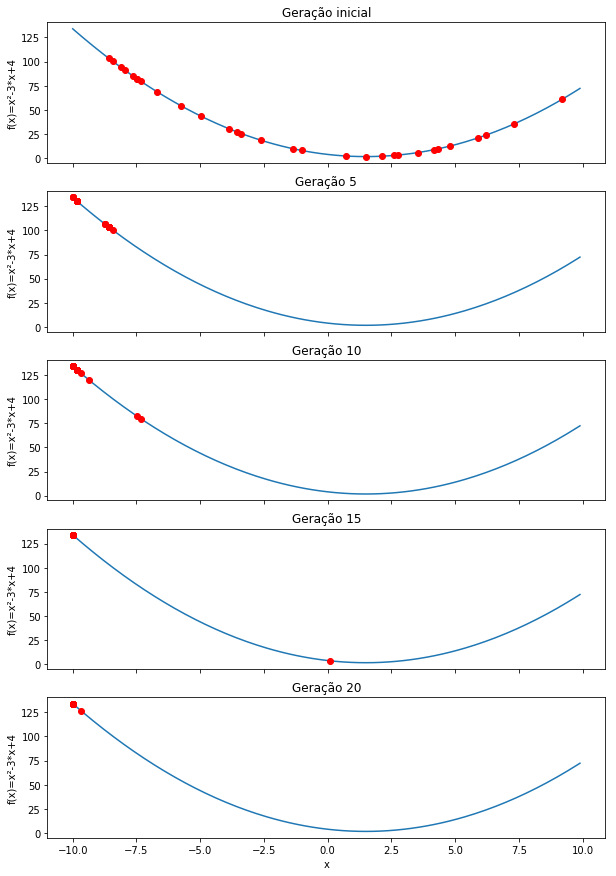

In [51]:
def main():
    # parâmetros da seguinte ordem:
    # lista do limite inferior e superior da função
    # tamanho da população inicial
    # número de gerações
    # taxa de mutação
    # taxa de crossover
    # número de bits que serão utilizados na representação binária dos cromossomos
    algoritmo_genetico = AG([-10, 10], 30, 20, 0.01, 0.7, 7)
    algoritmo_genetico.selecionar()


if __name__ == "__main__":
    main()